In [52]:
%matplotlib inline

In [53]:
from clawpack.geoclaw import dtopotools

In [78]:
subfault0 = dtopotools.SubFault()
subfault0.slip = 10.
subfault0.coordinate_specification = 'triangular'
subfault0._corners = [[2.5,0.,-4.],[0.,1.,-4.],[0.,0.,-5.]]
subfault0.calculate_geometry_triangles()

In [55]:
subfault1 = dtopotools.SubFault()
subfault1.slip = 10.
subfault1.coordinate_specification = 'triangular'
subfault1._corners = [[1.,0.,-4.],[0.,1.,-4.],[1.,1.,-3.]]
subfault1.calculate_geometry_triangles()

In [82]:
subfault0.n_gauss_pts = 3
subfault1.n_gauss_pts = 3

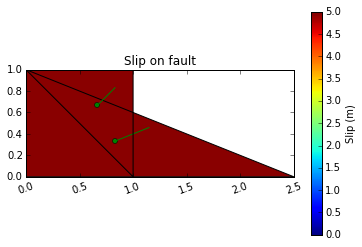

In [88]:
fault0 = dtopotools.Fault(subfaults=[subfault0,subfault1])
fault0.plot_subfaults(slip_color=True,plot_rake=True,cmin_slip=0.,cmax_slip=5.)

In [58]:
x,y = fault0.create_dtopo_xy(buffer_size=8.0)
dtopo = fault0.create_dtopography(x,y,times=[0.])

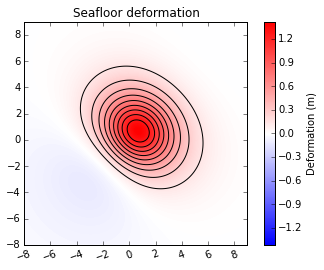

In [83]:
dtopo.plot_dZ_colors(0.)

In [60]:
import numpy as np

In [84]:
x = np.linspace(-10.,10.,200)
y = np.linspace(-10.,10.,200)

Dtopo = subfault0.okada(x,y)

In [85]:
print subfault0.dtopo.dZ[0,:,:].shape
print subfault0.slip
print subfault0.dip

(200, 200)
10.0
47.1240113334


In [63]:
dtopotools.LAT2METER

111133.84012073894

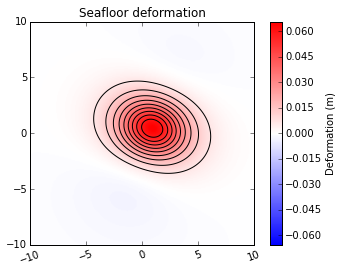

In [87]:
import matplotlib.pyplot as pl

# pl.pcolor(Dtopo.X,Dtopo.Y,Dtopo.dZ[0,:,:])
# pl.colorbar()

Dtopo.plot_dZ_colors(0.)

In [33]:
x,w = subfault0.gauss_pts

In [34]:
np.array?

In [35]:
slab_pts = np.loadtxt('cas_slab1.0_clip.xyz')

In [36]:
from scipy.spatial import Delaunay

tri = Delaunay(slab_pts[:,0:2])


In [37]:
I = np.invert(np.isnan(slab_pts[:,2]))
c4e = []
for j in range(tri.nsimplex):
    node_list = tri.simplices[j,:].tolist()
    if I[node_list[0]] and I[node_list[1]] and I[node_list[2]] :
        c1 = slab_pts[node_list[0],:].tolist()
        c2 = slab_pts[node_list[1],:].tolist()
        c3 = slab_pts[node_list[2],:].tolist()
        if (c2[1] > 49.7) and (c2[0] > -125.):
            c4e.append([c1,c2,c3])

In [38]:
import copy

subfaults = []



# j = 20

# subfault0 = dtopotools.SubFault()
# subfault0.coordinate_specification = 'triangular'
# subfault0.slip = 5.
# subfault0._corners = c4e[j]
# subfault0.calculate_geometry_triangles()
# subfaults.append(copy.copy(subfault0))

# N = min([100,len(c4e)])
N = len(c4e)
for j in range(N):
    subfault0 = dtopotools.SubFault()
    subfault0.coordinate_specification = 'triangular'
    subfault0.slip = 5.
    subfault0._corners = c4e[j]
    subfault0.calculate_geometry_triangles()
    subfaults.append(copy.copy(subfault0))


KeyboardInterrupt: 

In [ ]:
fault1 = dtopotools.Fault(subfaults=subfaults)

In [ ]:
fault1.containing_rect()

In [ ]:
import matplotlib.pyplot as pl

f,ax = pl.subplots(figsize=(20,20))
ax = fault1.plot_subfaults(axes=ax,plot_rake=True,slip_color=False,cmin_slip=0., cmax_slip=5.,verbose=True)